# Linear Regression Analysis of Gene Expression and Sex

This project involves working with three data frames: `Adipose_subcutaneous.csv`, `gencode26.csv`, and `GTEx_phenotypes.csv`, which contain information on adipose tissue samples.

The goal is to perform a linear regression analysis on a specific gene to investigate whether its expression levels are associated with sex. We will focus on calculating key metrics such as the p-value and beta (effect size) to assess the strength and significance of this association.

**Model Assumptions**:

Linear regression models make several assumptions:
* Linearity: The relationship between the independent variable (sex) and the dependent variable (gene expression) is linear.
* Independence: The observations are independent of each other.
* Homoscedasticity: The variance of the residuals (errors) is constant across all values of the independent variable.   
* Normality: The residuals are normally distributed.  

**P-value and Beta**:
* P-value: This indicates the statistical significance of the relationship between sex and gene expression. A lower p-value suggests a stronger association.
* Beta (effect size): This represents the magnitude and direction of the effect of sex on gene expression. A positive beta indicates that higher expression levels are associated with males, while a negative beta indicates higher expression levels are associated with females.

---

#### Import relevant libraries and modules

In [7]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Linear regression and statistical models
import statsmodels.api as sm
from statsmodels.formula.api import ols

# For visualizing regression results (if needed)
import matplotlib.pyplot as plt
import seaborn as sns

# For working with any potential categorical variables
from sklearn.preprocessing import LabelEncoder

#### Load the datasets

In [9]:
# Load the data
adipose = pd.read_csv("Adipose_subcutaneous.csv")
gencode = pd.read_csv("gencode26.csv")
phenotypes = pd.read_csv("GTEx_phenotypes.csv")

### Data exploration  
---
**1.**  `Adipose _subcutaneous.csv`

In [11]:
adipose.head()

,Name,Description,GTEX-1117F,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-113IC,...,GTEX-ZXES,GTEX-ZXG5,GTEX-ZYFC,GTEX-ZYFD,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYW4,GTEX-ZYY3,GTEX-ZZ64,GTEX-ZZPU
0,ENSG00000227232.5,WASH7P,1.847200,-0.65175,0.052753,-0.54499,-0.621940,-1.03440,0.00000,0.39101,...,-0.734270,0.77197,1.97260,0.85675,-0.22081,-0.86851,-2.13990,0.20007,0.056815,-1.50360
1,ENSG00000268903.1,RP11-34P13.15,-0.034206,0.65816,-0.874180,2.10480,-0.131140,-0.13926,1.48310,-1.71320,...,-0.811050,-0.58972,-1.37170,0.66317,-1.21410,-0.34681,0.30438,1.41420,-0.928540,0.90405
2,ENSG00000269981.1,RP11-34P13.16,0.376650,1.07460,-0.627070,2.34870,0.385110,0.42354,1.31540,-2.95370,...,-0.176010,-0.87230,-1.72360,-1.32480,-0.70066,0.45387,0.37243,1.58470,-1.162800,1.12500
3,ENSG00000241860.6,RP11-34P13.13,0.491370,-0.71747,-0.088030,1.05730,-0.018402,0.88677,1.63930,-1.70560,...,1.969100,-1.17960,-1.51210,-2.02940,-0.51457,-0.39216,0.43672,0.15809,-1.450900,0.66044
4,ENSG00000279457.4,RP11-34P13.18,1.173100,-0.65816,0.904050,-0.30438,-2.104800,-0.89801,-0.39857,-2.40770,...,-0.098735,1.76810,-0.94727,1.20570,0.78889,-0.13520,0.93474,0.65317,0.308600,-0.95359


This means there are **663 subject ids** on the `Adipose _subcutaneous` dataset.

In [13]:
adipose.shape

(19466, 665)

* Number of **unique genes** in the `Adipose _subcutaneous` dataset

In [15]:
adipose['Description'].nunique()

19457

In [16]:
adipose['Description'].duplicated().sum()

9

There are 9 duplicated genes. Since this is the dataframe that has the gene expression levels data, it's a good idea to drop the duplicated gene rows before merging with the other dataframes

In [18]:
adipose = adipose.drop_duplicates(subset='Description', keep='first')

In [19]:
adipose.shape

(19457, 665)

In [20]:
adipose.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19457 entries, 0 to 19465
Columns: 665 entries, Name to GTEX-ZZPU
dtypes: float64(663), object(2)
memory usage: 98.9+ MB


In [21]:
adipose.describe()

,GTEX-1117F,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-113IC,GTEX-117YX,GTEX-11DXW,...,GTEX-ZXES,GTEX-ZXG5,GTEX-ZYFC,GTEX-ZYFD,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYW4,GTEX-ZYY3,GTEX-ZZ64,GTEX-ZZPU
count,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,...,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000
mean,0.643666,0.201460,0.380913,0.115868,-0.506390,-0.421456,-0.195474,0.432963,-0.342554,-0.095230,...,-0.475384,0.395381,0.082038,-0.641523,0.095972,-0.085088,0.187726,-0.034628,-0.333406,-0.173342
std,1.181958,0.808412,0.869541,1.011069,0.738519,0.801530,0.822129,0.893706,0.936958,0.877632,...,0.957318,0.745503,0.844333,1.183658,0.762425,1.234812,0.878866,0.939057,0.913014,0.800117
min,-2.955600,-2.952300,-2.960900,-2.953700,-2.959500,-2.953200,-2.957100,-2.955200,-2.956100,-2.959500,...,-2.962300,-2.948800,-2.957600,-2.957100,-2.948800,-2.959000,-2.953200,-2.953700,-2.958000,-2.956600
25%,-0.171940,-0.345310,-0.173120,-0.585360,-1.023500,-0.994810,-0.746160,-0.161590,-0.988620,-0.704610,...,-1.148300,-0.084705,-0.457460,-1.524500,-0.398270,-0.961890,-0.414950,-0.703830,-0.983580,-0.725490
50%,0.690630,0.180590,0.436780,0.028274,-0.548900,-0.476970,-0.224420,0.444120,-0.423740,-0.122100,...,-0.557360,0.437260,0.093357,-0.720920,0.118210,-0.180010,0.199200,-0.074034,-0.380240,-0.185190
75%,1.523400,0.732280,0.994460,0.730950,-0.033988,0.108090,0.338430,1.046900,0.254160,0.485410,...,0.126670,0.912910,0.639780,0.161050,0.617980,0.731590,0.800890,0.595010,0.262650,0.372740
max,2.958500,2.957100,2.956600,2.962800,2.411200,2.594800,2.943400,2.959500,2.958500,2.955600,...,2.957600,2.953200,2.956600,2.959500,2.950300,2.958500,2.955200,2.956100,2.949300,2.717400


In [22]:
adipose.isna().any(axis=1).sum()

0

---

**2.** `GTEx_phenotypes.csv`

In [25]:
phenotypes.head()

,SUBJID,SEX,AGE,DTHHRDY
0,GTEX-1117F,2,65,4.0
1,GTEX-111CU,1,55,0.0
2,GTEX-111FC,1,65,1.0
3,GTEX-111VG,1,65,3.0
4,GTEX-111YS,1,65,0.0


**Note**: 
In the Genotype-Tissue Expression (GTEx) data(`GTEx_phenotypes.csv`), the DTHHRDY (death history) column is used to encode death classification based on the 4-point Hardy Scale. The coding corresponds to the following categories:  

* 0: Ventilator case
* 1: Violent and fast death
* 2: Fast death of natural causes
* 3: Intermediate death
* 4: Slow death 

In [27]:
phenotypes.shape

(979, 4)

**979 subject ids** on the `GTEx_phenotypes` dataset; **316** more than the `Adipose _subcutaneous` dataset

In [29]:
phenotypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SUBJID   979 non-null    object 
 1   SEX      979 non-null    int64  
 2   AGE      979 non-null    int64  
 3   DTHHRDY  961 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.7+ KB


In [30]:
phenotypes.describe()

,SEX,AGE,DTHHRDY
count,979.000000,979.000000,961.000000
mean,1.332993,53.181818,1.207076
std,0.471525,12.940150,1.446185
min,1.000000,25.000000,0.000000
25%,1.000000,45.000000,0.000000
50%,1.000000,55.000000,0.000000
75%,2.000000,65.000000,2.000000
max,2.000000,75.000000,4.000000


In [31]:
phenotypes.isna().any(axis=1).sum()

18

Null values will be addressed after merging dataframes.

---
**3.** `gencode26.csv`

In [34]:
gencode.head()

,id,chromosome,position,name,type
0,ENSG00000223972.5,chr1,11869,DDX11L1,transcribed_unprocessed_pseudogene
1,ENSG00000227232.5,chr1,29570,WASH7P,unprocessed_pseudogene
2,ENSG00000278267.1,chr1,17436,MIR6859-1,miRNA
3,ENSG00000243485.5,chr1,29554,MIR1302-2HG,lincRNA
4,ENSG00000284332.1,chr1,30366,MIR1302-2,miRNA


In [35]:
gencode.shape

(58219, 5)

* Number of **unique genes** in the `gencode` dataset

In [37]:
gencode['name'].nunique()

56470

**56470** unique genes on the `gencode` dataset, **37013** more than the `adipose` dataset.

In [39]:
gencode['name'].duplicated().sum()

1749

This means that there are **1749 duplicated genes**. 

In [41]:
gencode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58219 entries, 0 to 58218
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          58219 non-null  object
 1   chromosome  58219 non-null  object
 2   position    58219 non-null  int64 
 3   name        58219 non-null  object
 4   type        58219 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


In [42]:
gencode.isna().any(axis=1).sum()

0

---

### Merge dataframes  
Merge `adipose df` with `phenotypes df` first:
* Subject IDs Alignment: The `adipose` data has subject IDs as columns (like GTEX-1117F, GTEX-111CU), while the `phenotypes` data has subject 
  IDs as rows. But first, reshape the adipose data into a long format that allows it to associate each sample with its 
  corresponding phenotypic data (sex, age, etc.).
    
* Facilitates Analysis: After merging, we will have a consolidated dataset where each row represents a sample with its corresponding expression 
  levels and phenotype information. This will streamline the linear regression analysis.

* `pandas.melt()`: Unpivot a DataFrame from wide to long format, optionally leaving identifiers set. This function is useful to massage a DataFrame 
  into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), 
  are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

In [45]:
# 1. Reshape the adipose data
adipose_long = adipose.melt(id_vars=['Name', 'Description'], 
                             var_name='SUBJID', 
                             value_name='Expression')

adipose_long.head()

,Name,Description,SUBJID,Expression
0,ENSG00000227232.5,WASH7P,GTEX-1117F,1.847200
1,ENSG00000268903.1,RP11-34P13.15,GTEX-1117F,-0.034206
2,ENSG00000269981.1,RP11-34P13.16,GTEX-1117F,0.376650
3,ENSG00000241860.6,RP11-34P13.13,GTEX-1117F,0.491370
4,ENSG00000279457.4,RP11-34P13.18,GTEX-1117F,1.173100


In [46]:
# 2. Merge with the phenotypes data
merged_df = pd.merge(adipose_long, phenotypes, on='SUBJID')

# Display the first and last few rows of the merged DataFrame
merged_df

,Name,Description,SUBJID,Expression,SEX,AGE,DTHHRDY
0,ENSG00000227232.5,WASH7P,GTEX-1117F,1.847200,2,65,4.0
1,ENSG00000268903.1,RP11-34P13.15,GTEX-1117F,-0.034206,2,65,4.0
2,ENSG00000269981.1,RP11-34P13.16,GTEX-1117F,0.376650,2,65,4.0
3,ENSG00000241860.6,RP11-34P13.13,GTEX-1117F,0.491370,2,65,4.0
4,ENSG00000279457.4,RP11-34P13.18,GTEX-1117F,1.173100,2,65,4.0
...,...,...,...,...,...,...,...
12899986,ENSG00000198886.2,MT-ND4,GTEX-ZZPU,-0.168170,2,55,0.0
12899987,ENSG00000198786.2,MT-ND5,GTEX-ZZPU,1.869200,2,55,0.0
12899988,ENSG00000198695.2,MT-ND6,GTEX-ZZPU,1.664600,2,55,0.0
12899989,ENSG00000210194.1,MT-TE,GTEX-ZZPU,1.356700,2,55,0.0


In [47]:
merged_df['SUBJID'].nunique()

663

With a default `inner join`, all 316 subject ids from the `phenotypes df` with no matching rows in `adipose_long df` are dropped. 

* Merge `merged_df` with `gencode df`

In [50]:
# Step 3: Merge the previously merged data with the gencode data
final_merged_df = pd.merge(merged_df, gencode, left_on='Name', right_on='id', how='inner')

# Display the first few rows of the final merged DataFrame
final_merged_df.head()

,Name,Description,SUBJID,Expression,SEX,AGE,DTHHRDY,id,chromosome,position,name,type
0,ENSG00000227232.5,WASH7P,GTEX-1117F,1.847200,2,65,4.0,ENSG00000227232.5,chr1,29570,WASH7P,unprocessed_pseudogene
1,ENSG00000268903.1,RP11-34P13.15,GTEX-1117F,-0.034206,2,65,4.0,ENSG00000268903.1,chr1,135895,RP11-34P13.15,processed_pseudogene
2,ENSG00000269981.1,RP11-34P13.16,GTEX-1117F,0.376650,2,65,4.0,ENSG00000269981.1,chr1,137965,RP11-34P13.16,processed_pseudogene
3,ENSG00000241860.6,RP11-34P13.13,GTEX-1117F,0.491370,2,65,4.0,ENSG00000241860.6,chr1,173862,RP11-34P13.13,processed_transcript
4,ENSG00000279457.4,RP11-34P13.18,GTEX-1117F,1.173100,2,65,4.0,ENSG00000279457.4,chr1,195411,RP11-34P13.18,unprocessed_pseudogene


* Drop redundant columns

In [52]:
# Drop the redundant 'id' and 'name' columns after merging
final_merged_df.drop(columns=['id', 'name'], inplace=True)

In [53]:
final_merged_df.head()

,Name,Description,SUBJID,Expression,SEX,AGE,DTHHRDY,chromosome,position,type
0,ENSG00000227232.5,WASH7P,GTEX-1117F,1.847200,2,65,4.0,chr1,29570,unprocessed_pseudogene
1,ENSG00000268903.1,RP11-34P13.15,GTEX-1117F,-0.034206,2,65,4.0,chr1,135895,processed_pseudogene
2,ENSG00000269981.1,RP11-34P13.16,GTEX-1117F,0.376650,2,65,4.0,chr1,137965,processed_pseudogene
3,ENSG00000241860.6,RP11-34P13.13,GTEX-1117F,0.491370,2,65,4.0,chr1,173862,processed_transcript
4,ENSG00000279457.4,RP11-34P13.18,GTEX-1117F,1.173100,2,65,4.0,chr1,195411,unprocessed_pseudogene


* Final dataframe

In [55]:
df = final_merged_df
df.head()

,Name,Description,SUBJID,Expression,SEX,AGE,DTHHRDY,chromosome,position,type
0,ENSG00000227232.5,WASH7P,GTEX-1117F,1.847200,2,65,4.0,chr1,29570,unprocessed_pseudogene
1,ENSG00000268903.1,RP11-34P13.15,GTEX-1117F,-0.034206,2,65,4.0,chr1,135895,processed_pseudogene
2,ENSG00000269981.1,RP11-34P13.16,GTEX-1117F,0.376650,2,65,4.0,chr1,137965,processed_pseudogene
3,ENSG00000241860.6,RP11-34P13.13,GTEX-1117F,0.491370,2,65,4.0,chr1,173862,processed_transcript
4,ENSG00000279457.4,RP11-34P13.18,GTEX-1117F,1.173100,2,65,4.0,chr1,195411,unprocessed_pseudogene


In [56]:
df.shape

(12899991, 10)

In [57]:
df['Description'].nunique()

19457

With a default `inner join` here also, all 37013 gene names from the `gencode df` with no matching rows in `merged_df` are dropped. 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12899991 entries, 0 to 12899990
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Name         object 
 1   Description  object 
 2   SUBJID       object 
 3   Expression   float64
 4   SEX          int64  
 5   AGE          int64  
 6   DTHHRDY      float64
 7   chromosome   object 
 8   position     int64  
 9   type         object 
dtypes: float64(2), int64(3), object(5)
memory usage: 984.2+ MB


* **Summary statistics on combined datatframe**

In [61]:
# Group by gene and calculate mean expression for each gene
gene_summary = df.groupby('Description')['Expression'].describe()
gene_summary

,count,mean,std,min,25%,50%,75%,max
Description,,,,,,,,
A1BG,663.0,0.000959,0.972418,-2.9434,-0.646655,-0.012208,0.661775,2.9434
A1BG-AS1,663.0,0.000231,0.950058,-2.9295,-0.620690,-0.010640,0.625860,2.9295
A2M,663.0,0.011084,0.990547,-2.9523,-0.664595,0.007907,0.684450,2.9523
A2M-AS1,663.0,-0.001138,0.987071,-2.9527,-0.660925,-0.013817,0.665845,2.9527
A2ML1,663.0,-0.042765,0.952150,-2.9252,-0.673135,-0.062599,0.578660,2.9252
...,...,...,...,...,...,...,...,...
ZZEF1,663.0,-0.018988,0.929437,-2.9006,-0.626900,-0.021007,0.571045,2.9006
ZZZ3,663.0,0.071681,0.921230,-2.8838,-0.491900,0.081346,0.682240,2.8838
bP-21264C1.1,663.0,-0.013497,0.992699,-2.9503,-0.654645,-0.007958,0.649725,2.9503


* Check for missing values

In [63]:
df.isna().any(axis=1).sum()

233484

In [64]:
df.isna().sum()

Name                0
Description         0
SUBJID              0
Expression          0
SEX                 0
AGE                 0
DTHHRDY        233484
chromosome          0
position            0
type                0
dtype: int64

Since the regression analysis is NOT focused on the `DTHHRDY` column, I may not need to drop missing rows, as i do not want to reduce the statistical power of my analysis.

* Rename columns for better description

In [67]:
# Rename columns
df.rename(columns={
    'Description': 'Gene',
    'Name': 'Gene_id',
    'chromosome': 'Chromosome',
    'SUBJID': 'Subject_id',
    'type': 'Type',
    'position': 'Position',
    'SEX': 'Sex',
    'AGE': 'Age',
    'DTHHRDY': 'Death_history'
}, inplace=True)

# Display the first few rows to confirm the changes
df.head()

,Gene_id,Gene,Subject_id,Expression,Sex,Age,Death_history,Chromosome,Position,Type
0,ENSG00000227232.5,WASH7P,GTEX-1117F,1.847200,2,65,4.0,chr1,29570,unprocessed_pseudogene
1,ENSG00000268903.1,RP11-34P13.15,GTEX-1117F,-0.034206,2,65,4.0,chr1,135895,processed_pseudogene
2,ENSG00000269981.1,RP11-34P13.16,GTEX-1117F,0.376650,2,65,4.0,chr1,137965,processed_pseudogene
3,ENSG00000241860.6,RP11-34P13.13,GTEX-1117F,0.491370,2,65,4.0,chr1,173862,processed_transcript
4,ENSG00000279457.4,RP11-34P13.18,GTEX-1117F,1.173100,2,65,4.0,chr1,195411,unprocessed_pseudogene


---

#### Isolate gene

* Isolate gene column for names

In [71]:
# Keep track of the gene names in 'Description' for later reference during analysis
gene_names = adipose['Description']
gene_names.head(10)

0           WASH7P
1    RP11-34P13.15
2    RP11-34P13.16
3    RP11-34P13.13
4    RP11-34P13.18
5       AP006222.2
6    RP4-669L17.10
7         MTND1P23
8         MTND2P28
9         MTCO1P12
Name: Description, dtype: object

* Check if gene of interest is present in the gene subset df

In [73]:
# Check if gene exists in gene df subset
gene = 'SALL1'

if gene in gene_names.values:
    print("gene present in data")
else:
    print("gene Not present in data")

gene present in data


* **Gene - SALL1**

In [75]:
# Filter the DataFrame for the selected gene
gene_df1 = df[df['Gene'] == 'SALL1']

# Reset the index after filtering
gene_df1.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
gene_df1.head()

,Gene_id,Gene,Subject_id,Expression,Sex,Age,Death_history,Chromosome,Position,Type
0,ENSG00000103449.11,SALL1,GTEX-1117F,0.086272,2,65,4.0,chr16,51151367,protein_coding
1,ENSG00000103449.11,SALL1,GTEX-111CU,-0.787050,1,55,0.0,chr16,51151367,protein_coding
2,ENSG00000103449.11,SALL1,GTEX-111FC,-1.509200,1,65,1.0,chr16,51151367,protein_coding
3,ENSG00000103449.11,SALL1,GTEX-111VG,-0.607150,1,65,3.0,chr16,51151367,protein_coding
4,ENSG00000103449.11,SALL1,GTEX-111YS,-0.406500,1,65,0.0,chr16,51151367,protein_coding


In [76]:
gene_df1.shape

(663, 10)

---

### Exploratory data analysis

* Summary Statistics

In [80]:
# Summary statistics
gene_df1['Expression'].describe()

count    663.000000
mean      -0.014090
std        1.007940
min       -2.955200
25%       -0.686840
50%       -0.007833
75%        0.667135
max        2.955200
Name: Expression, dtype: float64

The expression levels of **SALL1** appear to be normally distributed, with **a mean close to zero** and a **standard deviation of around 1**. This suggests that the expression values are centered around the mean with a relatively balanced spread.  

The range of expression levels is between `-2.955 and 2.955`, indicating some variability in the data.

* Value count for `Sex column`; values encoded as 1 for male, and 2 for female.

In [83]:
# Distribution of sex
gene_df1['Sex'].value_counts()

Sex
1    445
2    218
Name: count, dtype: int64

There are **445 males and 218 females** in this subset data, giving a sex ratio of approximately 2:1, which should be kept in mind during the analysis.

* Distribution of Gene Expression Levels

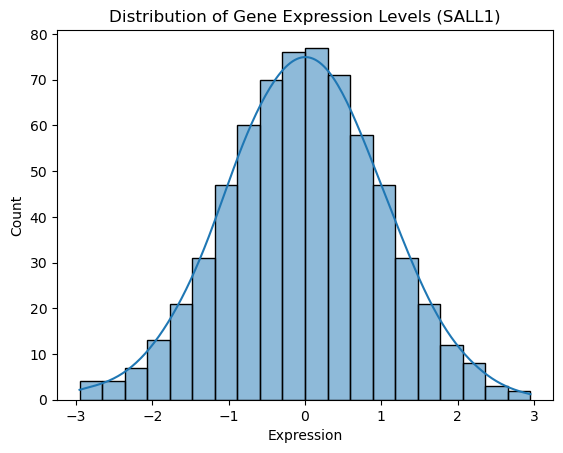

In [86]:
# Plot distribution of expression levels
sns.histplot(gene_df1['Expression'], kde=True)
plt.title('Distribution of Gene Expression Levels (SALL1)')
plt.show()

Expression levels for gene SALL1 are approximately normally distributed

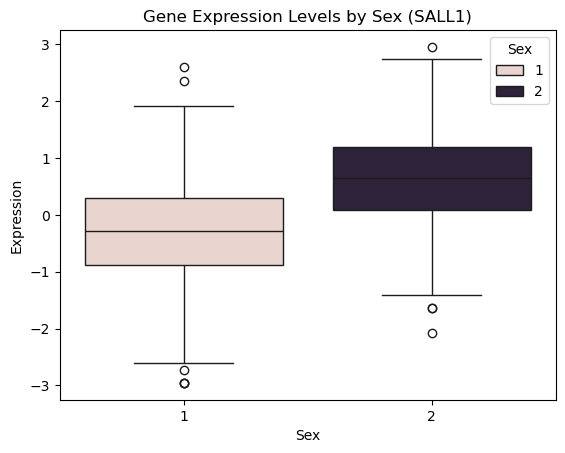

In [209]:
# Boxplot for sex vs. gene expression
sns.boxplot(x='Sex', y='Expression', data=gene_df1, hue='Sex')
plt.title('Gene Expression Levels by Sex (SALL1)')
plt.show()

The boxplot show some **outliers** in gene expression levels for both males and females. These outliers could influence the results of the regression, so it may be useful to investigate or address them before running the model (e.g., by removing them, analyzing separately, or transforming the data).

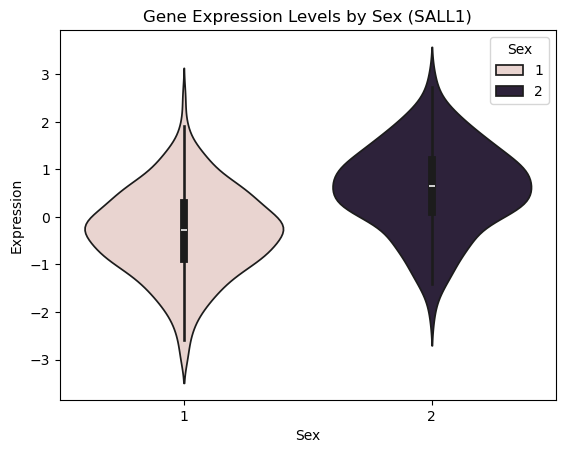

In [195]:
# Violin plot to check the distribution
sns.violinplot(x='Sex', y='Expression', hue='Sex', data=gene_df1)
plt.title('Gene Expression Levels by Sex (SALL1)')
plt.show()

* Median `Expression` values by `Sex`

In [92]:
gene_df1.groupby('Sex')['Expression'].median()

Sex
1   -0.28176
2    0.65254
Name: Expression, dtype: float64

* Mean `Expression` values by `Sex`

In [94]:
gene_df1.groupby('Sex')['Expression'].mean()

Sex
1   -0.316596
2    0.603411
Name: Expression, dtype: float64

Both the mean and median expression values for females are higher than those for males, suggesting that there might be a noticeable difference in expression levels between sexes, which is worth testing in the linear regression model.

**Identify outliers**

In [97]:
Q1 = gene_df1['Expression'].quantile(0.25)
Q3 = gene_df1['Expression'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = gene_df1[(gene_df1['Expression'] < lower_bound) | (gene_df1['Expression'] > upper_bound)]

# Display outliers
outliers_iqr

,Gene_id,Gene,Subject_id,Expression,Sex,Age,Death_history,Chromosome,Position,Type
168,ENSG00000103449.11,SALL1,GTEX-14ICL,-2.9552,1,35,0.0,chr16,51151367,protein_coding
173,ENSG00000103449.11,SALL1,GTEX-14PHX,-2.7344,1,55,0.0,chr16,51151367,protein_coding
232,ENSG00000103449.11,SALL1,GTEX-1A8G7,-2.9552,1,65,2.0,chr16,51151367,protein_coding
256,ENSG00000103449.11,SALL1,GTEX-1C6VS,-2.9552,1,65,2.0,chr16,51151367,protein_coding
382,ENSG00000103449.11,SALL1,GTEX-1JN76,2.7344,2,25,0.0,chr16,51151367,protein_coding
648,ENSG00000103449.11,SALL1,GTEX-ZVT2,2.9552,2,55,0.0,chr16,51151367,protein_coding


**Keeping the outliers**  

* If the outliers represent real biological variability (and not measurement errors or anomalies), they might contain valuable information, 
  especially in biological data, where extreme values could indicate meaningful biological processes.  

* Since the focus is on determining if there's a statistically significant association between SALL1 gene expression and sex, removing these outliers 
  could distort the biological significance.

---

### Build the linear regression model

In [101]:
# Subset Data
lr_df = gene_df1[["Expression", "Sex"]]

Next, construct the linear regression formula, and save it as a string. The `y or dependent variable` comes before the `~`, and the `x or independent` variable comes after the `~`.

In [103]:
# Define the formula
ols_formula = 'Expression ~ C(Sex)'

In [104]:
# Build OLS 
OLS = ols(formula = ols_formula, data = lr_df)

In [105]:
# Fit model to data
model = OLS.fit()

* Call the `summary()` function on the `model` object to get the coefficients and more statistics about the model.

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Expression   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     149.2
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           4.41e-31
Time:                        14:33:03   Log-Likelihood:                -878.03
No. Observations:                 663   AIC:                             1760.
Df Residuals:                     661   BIC:                             1769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3166      0.043     -7.330      0.000      -0.401      -0.232
C(Sex)[T.2]     0.9200      0.075     12.214      0.000       0.772       1.068
==============================================================================
Omnibus:                        3.176   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                3.002
Skew:                          -0.157   Prob(JB):                        0.223
Kurtosis:                       3.103   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluating the regression model summary

#### 1. Model Overview:
- **Dependent Variable**: The dependent variable is **Expression**, which represents the expression levels of the gene SALL1.
- **No. Observations**: There are **663** observations in the dataset, meaning 663 samples were used in the analysis.

#### 2. Model Fit Statistics:
- **R-squared**: **0.184**
  - This means that approximately **18.4%** of the variance in the expression levels can be explained by the model. This is relatively low, indicating that other factors not included in the model may also influence expression levels.
  
- **Adjusted R-squared**: **0.183**
  - The adjusted R-squared adjusts the R-squared value for the number of predictors in the model, but since there's only one predictor (Sex), it's very similar to the R-squared value.

- **F-statistic**: **149.2**
  - This tests the overall significance of the model. A high F-statistic indicates that at least one of the predictors is significantly related to the dependent variable.

- **Prob (F-statistic)**: **4.41e-31**
  - This is the p-value associated with the F-statistic. A value this low (< 0.05) indicates that the model is statistically significant overall, meaning that the predictor (Sex) has a significant effect on expression levels.

#### 3. Coefficients:
- **Intercept**: 
  - **Coef**: **-0.3166**
  - **Std Err**: **0.043**
  - **t**: **-7.330**
  - **P>|t|**: **0.000**
  - Interpretation: When Sex is 1 (male), the expected expression level of SALL1 is approximately **-0.3166**. This coefficient is statistically significant (p < 0.001).

- **C(Sex)[T.2]**:
  - **Coef**: **0.9200**
  - **Std Err**: **0.075**
  - **t**: **12.214**
  - **P>|t|**: **0.000**
  - Interpretation: When Sex is 2 (female), the expected expression level of SALL1 increases by **0.9200** compared to males (Sex = 1). This coefficient is also statistically significant (p < 0.001).

#### 4. Residual Statistics:
- **Omnibus**: **3.176**
- **Prob(Omnibus)**: **0.204**
  - This tests the normality of residuals. A p-value > 0.05 suggests that the residuals are normally distributed.

- **Durbin-Watson**: **1.948**
  - This statistic tests for autocorrelation in residuals. Values close to 2 indicate no autocorrelation. This value suggests that autocorrelation is not a concern.

- **Jarque-Bera (JB)**: **3.002**
- **Prob(JB)**: **0.223**
  - This is another test for normality of residuals, supporting that the residuals are normally distributed.

---

### Finish checking model assumptions

The **linearity assumption** for the regression model has been assessed through box plots comparing SALL1 expression levels between males and females. The distinct distributions observed, along with the significant linear regression results (p < 0.001), indicate that the assumption is satisfied when comparing the means of the two groups.

The **independent observations assumption** is met, as the observations in the dataset represent distinct subjects, ensuring that the measurements of gene expression for each individual do not influence one another.

The **normality and homoscedasticity assumptions** focus on the distribution of errors. Thus, you can only check these assumptions after you have constructed the model.

These assumptions pertain to the distribution of residuals in the regression model. Residuals are the differences between the observed expression levels of the SALL1 gene and the predicted values derived from the regression model.

By analyzing the residuals, we can evaluate whether they follow a normal distribution and exhibit constant variance across different levels of the independent variable, 'Sex'. These checks are crucial for ensuring the reliability and validity of the regression results, as violations of these assumptions may affect the inferences drawn from the model.

In [115]:
# Extract the residuals
residuals = model.resid

In [116]:
# Get the predicted/fitted values
predicted_values = model.predict()

**Check normality of residuals with a Histogram and Q-Q plot**

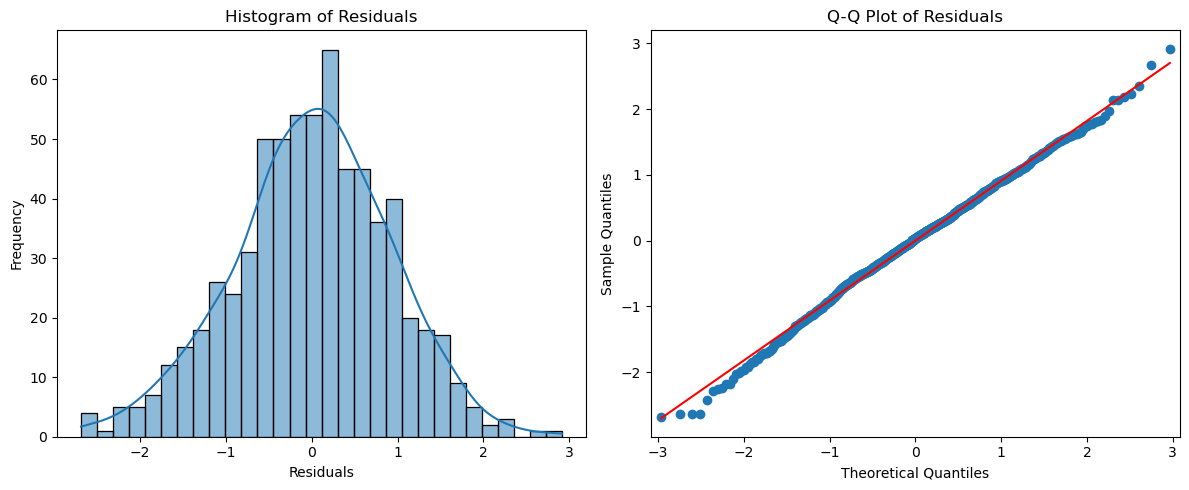

In [118]:
# Figure size
plt.figure(figsize=(12, 5))

# Histogram of residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

* **Histogram**: Displays the distribution of residuals, with a kernel density estimate overlay to visualize normality.

* **Q-Q Plot**: Compares the quantiles of the residuals against the quantiles of a normal distribution. A straight line indicates that the residuals are normally distributed.

**Check homoscedasticity**

Since the independent variable `Sex` is categorical with only two groups (male and female), a scatter plot may not effectively convey the information needed to assess homoscedasticity.  

You can create a box plot of the residuals for each category of 'Sex'. This will allow you to visually compare the spread (variability) of residuals between the two groups.

If the box plots for the two groups have similar spreads (i.e., the interquartile ranges are comparable), it suggests that the assumption of homoscedasticity is met.

* Box Plot of `Residuals` for each category of `Sex`

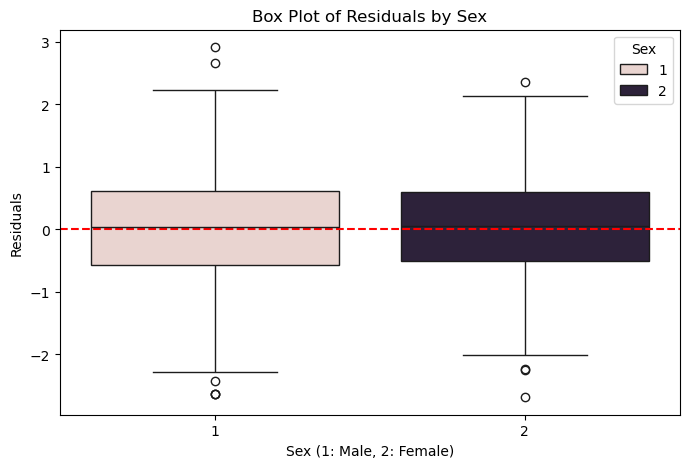

In [197]:
# Create a DataFrame with residuals and sex
sex = lr_df['Sex']
residuals_df = pd.DataFrame({'Residuals': residuals, 'Sex': sex})

# Create box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sex', y='Residuals', hue='Sex', data=residuals_df)
plt.title('Box Plot of Residuals by Sex')
plt.xlabel('Sex (1: Male, 2: Female)')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()

The difference in whisker lengths between the male and female boxplots is relatively small, indicating the potential for **minor heteroscedasticity**. However, since the residual spread is fairly consistent between the two categories, any violation of the homoscedasticity assumption is likely minimal and should not significantly impact the model's performance.  

The box plot of residuals showing a line that runs through zero for both male and female categories is a positive sign. It indicates that the **residuals are centered around zero** for each group, suggesting that the model is unbiased and that predictions are not systematically higher or lower for either males or females.

A more formal **test for heteroscedasticity**, like the **Breusch-Pagan test**, can be performed to further verify. Minor deviations in heteroscedasticity are common, and if the model's other assumptions hold, it may still be reliable.

In [126]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(model.resid, model.model.exog)

# Display the results
print(f"LM statistic: {lm}")
print(f"LM test p-value: {lm_pvalue}")
print(f"F-statistic: {fvalue}")
print(f"F-test p-value: {f_pvalue}")

LM statistic: 0.0009914634988262838
LM test p-value: 0.9748807500882027
F-statistic: 0.0009884741369045166
F-test p-value: 0.9749281253036753


The Breusch-Pagan test results indicate that **heteroscedasticity is not a concern in this model**. The LM test p-value (0.9749) and the F-test p-value (0.9749) are both significantly higher than the common threshold of 0.05, suggesting that the variance of the residuals is constant across the different levels of the predictor. Therefore, the **assumption of homoscedasticity** is upheld, and the model can be considered reliable with respect to this assumption.

### Conclusion:
The linear regression analysis revealed a significant association between sex and the expression levels of the gene SALL1. The model produced a **p-value of less than 0.001**, indicating strong statistical significance. Furthermore, the **beta (effect size) for sex was found to be 0.9200**, suggesting that females exhibit, on average, a 0.920 increase in **SALL1** expression compared to males. This indicates a meaningful impact of sex on the expression of this gene.  

However, the low R-squared value suggests that other variables might also influence expression levels and should be considered in further analyses.

#### Next Steps:
- Consider adding other predictors or covariates that could influence gene expression, such as age or death history, in future models to improve the explanatory power of the model.
  
- Conduct residual analysis to check the assumptions of linear regression, such as homoscedasticity (constant variance of errors) and linearity.